In [1]:
import numpy as np
from math import exp
from random import seed
from random import random
import matplotlib.pyplot as plt
from matplotlib import cm
 
#from: https://machinelearningmastery.com/blog/ with small changes for error computation
#https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/


#for regression, without activation function, https://hmkcode.com/netflow/
# for derivative computation https://medium.com/swlh/backpropagation-step-by-step-13f2b6c0b414


In [2]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


In [3]:
# Calculate input of a neuron 
def compute_input(weights, inputs):
    ins = weights[-1]
    for i in range(len(weights)-1):
       ins += weights[i] * inputs[i]
    return  ins
 
# Apply activation function on the input of a neuron
#se numea transfer
def sigmoid_activation(inputvalue):
    return 1.0 / (1.0 + exp(0-inputvalue))


In [4]:
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    outputs = row
    for layer in network:
        new_outputs = []
        for neuron in layer:
            current_input = compute_input(neuron['weights'], outputs)
            neuron['output'] = sigmoid_activation(current_input)
            new_outputs.append(neuron['output'])
        outputs = new_outputs
    return outputs
 

In [10]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):#derivative of sigmoid f : f(x)(1-f(x))
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):  # starts from the last layer
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                   error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else: # it's the last layer
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output']) 
                
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 


In [19]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))


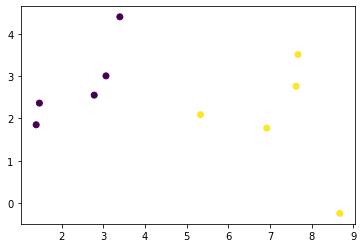

In [30]:
    
# Test training backprop algorithm

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
dataset_numpy=np.array(dataset)
x1,x2,y=dataset_numpy[:,0], dataset_numpy[:,1], dataset_numpy[:,2]
plt.scatter( x1,x2, c=y)
plt.show()


In [34]:
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)

print(n_inputs, n_outputs)
for layer in network:
    print(layer)



2 2
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
[{'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]


In [35]:
train_network(network, dataset, 0.5, 20, n_outputs)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132


In [36]:

#predict after each forward/backward
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
